# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

2023-07-08 10:17:14.512275: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 10:17:15.367850: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 10:17:15.374271: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 10:17:21.414132: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In [3]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.6 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [4]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [5]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 4s 44ms/step - loss: 1.5104 - mse: 1.5104 - val_loss: 1.0812 - val_mse: 1.0812
Epoch 2/30
32/32 [==============================] - 1s 18ms/step - loss: 0.8843 - mse: 0.8843 - val_loss: 0.7492 - val_mse: 0.7492
Epoch 3/30
32/32 [==============================] - 0s 13ms/step - loss: 0.6295 - mse: 0.6295 - val_loss: 0.5963 - val_mse: 0.5963
Epoch 4/30
32/32 [==============================] - 0s 14ms/step - loss: 0.5134 - mse: 0.5134 - val_loss: 0.5095 - val_mse: 0.5095
Epoch 5/30
32/32 [==============================] - 1s 16ms/step - loss: 0.4495 - mse: 0.4495 - val_loss: 0.4507 - val_mse: 0.4507
Epoch 6/30
32/32 [==============================] - 0s 14ms/step - loss: 0.4089 - mse: 0.4089 - val_loss: 0.4099 - val_mse: 0.4099
Epoch 7/30
32/32 [==============================] - 0s 15ms/step - loss: 0.3841 - mse: 0.3841 - val_loss: 0.3814 - val_mse: 0.3814
Epoch 8/30
32/32 [==============================] - 0s 15ms/step - loss: 0.3684 - m

In [6]:
# return weights and biases
model.get_weights()

[array([[1.9738027]], dtype=float32), array([1.0177699], dtype=float32)]

In [7]:
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 29ms/step - loss: 5.9255e-04 - mse: 5.9255e-04

Test loss: 0.0005925456644035876
Test accuracy: 0.0005925456644035876


In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 27ms/step - loss: 0.3032 - mse: 0.3032

Test loss: 0.3031867742538452
Test accuracy: 0.3031867742538452


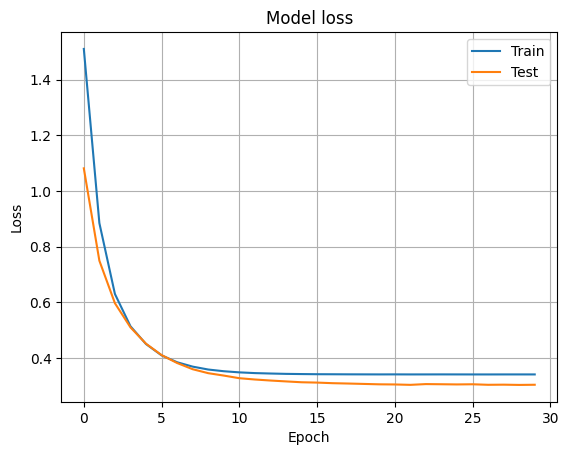

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 6ms/step


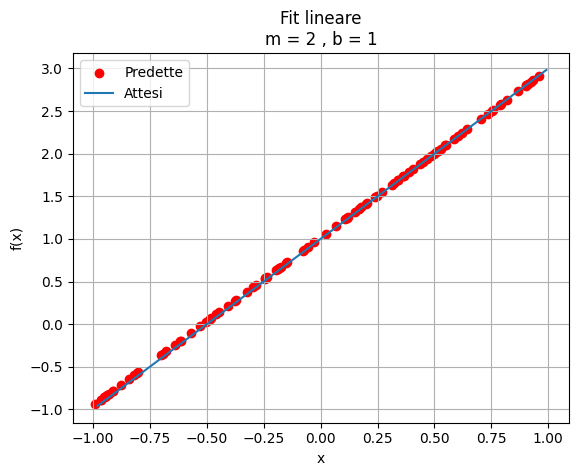

In [10]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r',label="Predette")
plt.plot(x_valid, y_target,label="Attesi")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(f"Fit lineare\nm = {m} , b = {b}")
plt.grid(True)
plt.show()

Osserviamo che con l'aumentare del numero di $N_{train}$ ed $N_{epochs}$ aumentiamo l'accuratezza del fit. Il primo perchè avendo più dati possiamo allenare maggiormerte la *NN*, analogamente la seconda indica il "tempo di allenamento".

Invece $\sigma$ aumenta la difficoltà del fit: con dispersioni maggiori la rete farà più fatica a fittare i dati.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [11]:
a=3
b=-2
c=-3
d=4

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2500)
x_valid = np.random.uniform(-1, 1, 250)
x_valid.sort()
y_target = a*x_valid**3+b*x_valid**2+c * x_valid + d # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a*x_train**3+b*x_train**2+c * x_train + d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a*x_valid**3+b*x_valid**2+c * x_valid + d, sigma)

model1 = tf.keras.Sequential([
    keras.layers.Dense(4,activation='tanh',input_shape=(1,)),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1)
])

# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='adam', loss='mse', metrics=['mse'])

history = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
79/79 [==============================] - 4s 12ms/step - loss: 11.8214 - mse: 11.8214 - val_loss: 11.1235 - val_mse: 11.1235
Epoch 2/50
79/79 [==============================] - 0s 6ms/step - loss: 10.2779 - mse: 10.2779 - val_loss: 9.4366 - val_mse: 9.4366
Epoch 3/50
79/79 [==============================] - 0s 6ms/step - loss: 8.4315 - mse: 8.4315 - val_loss: 7.2969 - val_mse: 7.2969
Epoch 4/50
79/79 [==============================] - 1s 7ms/step - loss: 5.9994 - mse: 5.9994 - val_loss: 4.5089 - val_mse: 4.5089
Epoch 5/50
79/79 [==============================] - 1s 7ms/step - loss: 2.9497 - mse: 2.9497 - val_loss: 1.4935 - val_mse: 1.4935
Epoch 6/50
79/79 [==============================] - 1s 7ms/step - loss: 0.8835 - mse: 0.8835 - val_loss: 0.5405 - val_mse: 0.5405
Epoch 7/50
79/79 [==============================] - 1s 7ms/step - loss: 0.5046 - mse: 0.5046 - val_loss: 0.3956 - val_mse: 0.3956
Epoch 8/50
79/79 [==============================] - 1s 7ms/step - loss: 0.4395 - ms

In [12]:
# evaluate model
score = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model1.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 [==============================] - 0s 12ms/step - loss: 0.0985 - mse: 0.0985

Test loss: 0.09845533967018127
Test accuracy: 0.09845533967018127
8/8 [==============================] - 0s 5ms/step - loss: 0.0117 - mse: 0.0117

Test loss: 0.011736731976270676
Test accuracy: 0.011736731976270676


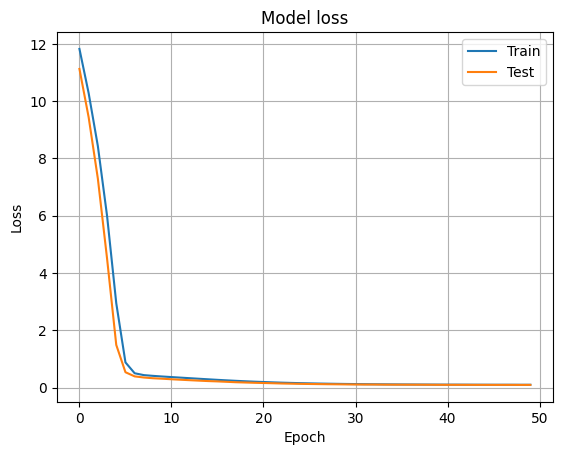

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 10ms/step


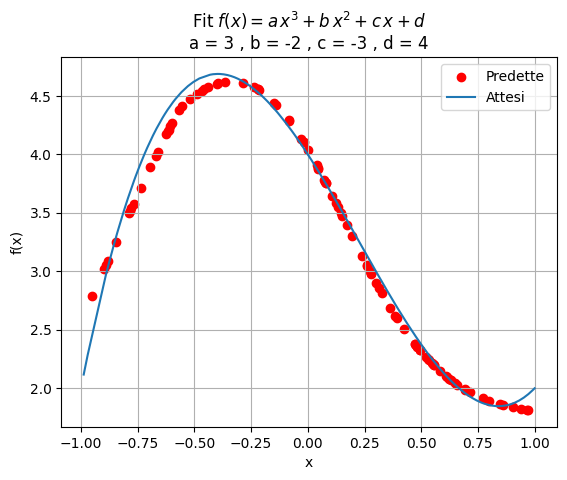

In [14]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model1.predict(x_predicted)

plt.scatter(x_predicted, y_predicted,color='r',label="Predette")
plt.plot(x_valid, y_target,label="Attesi")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(f"Fit $f(x)=a\,x^3+b\,x^2+c\,x+d$\na = {a} , b = {b} , c = {c} , d = {d}")

plt.grid(True)
plt.show()

4/4 [==============================] - 0s 6ms/step


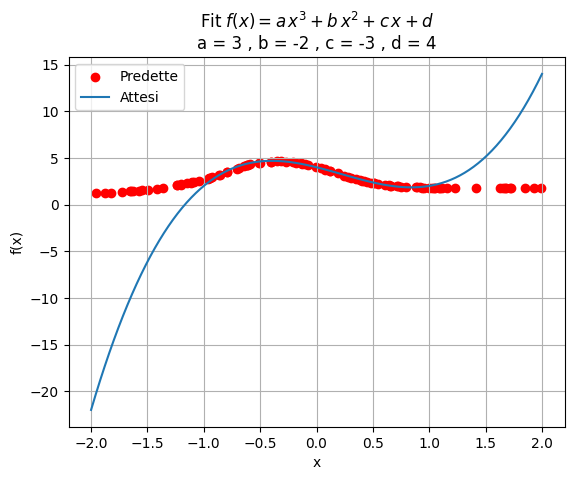

In [15]:
x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model1.predict(x_predicted)
x_valid=np.linspace(-2,2,100)
y_target=a*x_valid**3+b*x_valid**2+c*x_valid+d
plt.scatter(x_predicted, y_predicted,color='r',label="Predette")
plt.plot(x_valid, y_target,label="Attesi")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(f"Fit $f(x)=a\,x^3+b\,x^2+c\,x+d$\na = {a} , b = {b} , c = {c} , d = {d}")
plt.grid(True)
plt.show()

Cambiando i valori e i metodi abbiamo concluso che:
- Il fit è piu preciso aumentando il numero di neuroni.
- Aumentare il numero di layers aiuta notevolmente il fit e può diminuire il numero di neuroni per layer.
- Alcune funzioni di attivazione che fittano bene la funzione sono:
    - ELU
    - SELU
    - TanH
    - Soft Sign
    
    Mentre la RELU non è la migliore ma è l'unica che trova l'ultima salita.
- I metodi di ottimizzazione più utili sono ADAM e SGD.
- Le loss function che fittano al meglio sono MSE, MAE.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

In [16]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 2500)
y_train = np.random.uniform(-1.5, 1.5, 2500)

x_valid = np.random.uniform(-1.5, 1.5, 250)
y_valid = np.random.uniform(-1.5, 1.5, 250)

x_valid.sort()
y_valid.sort()

z_target = np.sin(x_valid**2+y_valid**2) # ideal (target) linear function

sigma = 0.3 # noise standard deviation
z_train = np.random.normal(np.sin(x_train**2+y_train**2),sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(x_valid**2+y_valid**2),sigma)

model2 = tf.keras.Sequential([
    keras.layers.Dense(40, activation='softsign', input_shape=(2,)),
    keras.layers.Dense(30, activation='softsign'),
    keras.layers.Dense(20, activation='softsign'),
    keras.layers.Dense(10, activation='softsign'),
    keras.layers.Dense(1)
])

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='adam', loss='mse')

history = model2.fit(x=np.column_stack((x_train,y_train)), y=z_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(np.column_stack((x_valid,y_valid)), z_valid))


Epoch 1/50
79/79 [==============================] - 5s 19ms/step - loss: 0.3180 - val_loss: 0.3714
Epoch 2/50
79/79 [==============================] - 1s 9ms/step - loss: 0.2547 - val_loss: 0.3647
Epoch 3/50
79/79 [==============================] - 1s 13ms/step - loss: 0.2520 - val_loss: 0.3584
Epoch 4/50
79/79 [==============================] - 1s 10ms/step - loss: 0.2513 - val_loss: 0.3491
Epoch 5/50
79/79 [==============================] - 1s 15ms/step - loss: 0.2483 - val_loss: 0.3512
Epoch 6/50
79/79 [==============================] - 1s 13ms/step - loss: 0.2452 - val_loss: 0.3451
Epoch 7/50
79/79 [==============================] - 1s 16ms/step - loss: 0.2422 - val_loss: 0.3184
Epoch 8/50
79/79 [==============================] - 1s 16ms/step - loss: 0.2367 - val_loss: 0.3167
Epoch 9/50
79/79 [==============================] - 1s 12ms/step - loss: 0.2308 - val_loss: 0.3199
Epoch 10/50
79/79 [==============================] - 1s 11ms/step - loss: 0.2213 - val_loss: 0.3087
Epoch 11/5

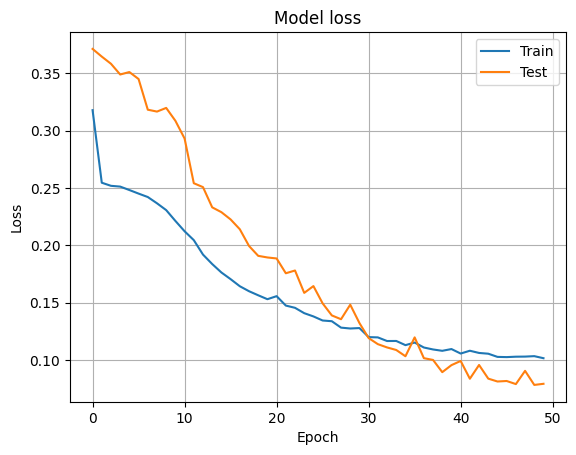

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

313/313 [==============================] - 3s 9ms/step


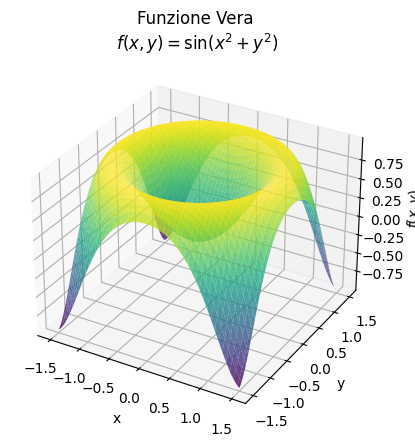

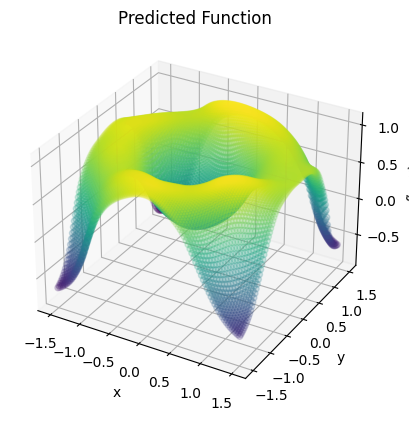

8/8 [==============================] - 0s 5ms/step - loss: 0.0793

Test loss: 0.07928677648305893


In [22]:
# Generate grid points to evaluate the function over the given range
x_target = np.linspace(-1.5, 1.5, 100)
y_target = np.linspace(-1.5, 1.5, 100)
x_target, y_target = np.meshgrid(x_target, y_target)
z_target = np.sin(x_target**2 + y_target**2)

x_flat = x_target.flatten()
y_flat = y_target.flatten()

# Valuto i punti con il model2
z_pred = model2.predict(np.column_stack((x_flat, y_target_flat)))
z_pred = z_pred.reshape(x_target.shape)

# Funzione Vera
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_target, y_target, z_target, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r"$f(x,y)$")
ax.set_title(f"Funzione Vera\n $f(x,y)=\sin(x^2+y^2)$")
plt.show()

# Funfione Predetta
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_flat, y_flat, z_pred, c=z_pred, cmap='viridis', alpha= 0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r"$f(x,y)$")
ax.set_title('Predicted Function')

plt.show()

# Evaluate the model2
score = model2.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score)